<a href="https://colab.research.google.com/github/ABCOM2000/TensorFlowBook/blob/master/Ch2TrivialMLApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
import numpy as np

In [0]:
number_of_data_points = 1000

# Explain random.uniform.
## This random.uniform module of numpy package helps us to generate random samples which are uniformly distributed over a given range which we pass as paramter.

##Parameters:
###low : The number from where the generation will start.
###high : The number where the generation of samples will end.
###size : The number of samples we want

In [0]:
x = np.random.uniform(low = -5 , high = 5 , size = (number_of_data_points, 1))

# Print all output to a single decimal

In [6]:
x[:5,:]

array([[ 0.83033105],
       [ 1.85749785],
       [-3.74936604],
       [-0.94859822],
       [-1.38859238]])

#Printing the output to single decimal

In [7]:
x[:5,:].round(1)

array([[ 0.8],
       [ 1.9],
       [-3.7],
       [-0.9],
       [-1.4]])

In [0]:
y = np.random.uniform(-5 , 5 , size = (number_of_data_points , 1))

In [9]:
y[:5,:]

array([[ 2.04832314],
       [-1.02722265],
       [-3.79171326],
       [ 0.83595014],
       [ 3.37870227]])

In [10]:
y[:5,:].round(1)

array([[ 2. ],
       [-1. ],
       [-3.8],
       [ 0.8],
       [ 3.4]])

In [0]:
bias = np.random.uniform(low =-1 , high =1, size = (number_of_data_points, 1))

In [0]:
z = 7*x + 6*y + 5 + bias

In [13]:
z[:5,:].round(1)

array([[ 22.6],
       [ 11.1],
       [-44.3],
       [  4.3],
       [ 16. ]])

In [0]:
input_1 = np.column_stack((x,y))

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1,)])

# Briefly explain the parameters in the following statement.
## This model.compile method configures the model for training. It deteremines the type of loss and the type of optimizer which will applied to the model to minimize the loss function.

##**Parameters**:
##**optimizer** : The goal of machine learning and deep learning is to reduce the difference between the predicted output and the actual output. This is also called as a Cost function(C) or Loss function. 'sgd' is an iterative optimization algorithm which updates the weights in the right direction to minimize the loss function.
##**loss** : This determines the difference betwwen the real output and the predicted output. Mean_Squared_error is commonly used loss function for regression model. in this loss function we take the mean of squared difference of real output and predicted output.  
##**metrics**: Here the mse is chosen as a metrics which is mean_squared_error. It is a basis for the evaluation of our model.The lesser the value of error, the better the model will be in predicting the real life and unseen inputs.




In [0]:
model.compile(optimizer = 'sgd' , loss = 'mean_squared_error' , metrics = ['mse'] )

# Explain why do we need history?
##Keras provides the capability to register callbacks when training a deep learning model.One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy for (classification problems) as well as the loss and accuracy for the validation dataset. In case of regression model we are able to plot the error vs epochs and loss vs epochs graphs

In [0]:
from tensorflow.keras.callbacks import History 
history = History()

# Explain parameters in the fit statement.
##First we need to provide the input and target variables from which our model will learn. The weights are initalized, the inputs are processed, the output is predicted, then we compare the real output with the predicted one. Then we backpropagate and update the weights.

##We determine the number of epochs, The number of times the complete dataset will be processed. The number of times the complete dataset will be iterated.

##verbose =1 , if we want to display the training of model

## validation_split is used to determine the validation_data that will be used to test our model on unseen datasets while traning.

##callbacks = The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

In [18]:
model.fit(input_1 , z , epochs = 10 , verbose = 1, validation_split=0.2, callbacks=[history])

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 419us/sample - loss: 119.9525 - mse: 119.9525 - val_loss: 10.8745 - val_mse: 10.8745
Epoch 2/10
800/800 [==============================] - 0s 64us/sample - loss: 7.0069 - mse: 7.0069 - val_loss: 4.2015 - val_mse: 4.2015
Epoch 3/10
800/800 [==============================] - 0s 70us/sample - loss: 2.7813 - mse: 2.7813 - val_loss: 1.8250 - val_mse: 1.8250
Epoch 4/10
800/800 [==============================] - 0s 67us/sample - loss: 1.2281 - mse: 1.2281 - val_loss: 0.8757 - val_mse: 0.8757
Epoch 5/10
800/800 [==============================] - 0s 65us/sample - loss: 0.6642 - mse: 0.6642 - val_loss: 0.5351 - val_mse: 0.5351
Epoch 6/10
800/800 [==============================] - 0s 65us/sample - loss: 0.4588 - mse: 0.4588 - val_loss: 0.4085 - val_mse: 0.4085
Epoch 7/10
800/800 [==============================] - 0s 61us/sample - loss: 0.3861 - mse: 0.3861 - val_loss: 0.3575 - val_mse: 0.3575
Ep

Predicting output on unknown values, x = 2 and y = 3

In [19]:
result = model.predict([[2,3]])
print(result)

[[37.004883]]


# in the above statement, print on the float value and not its data type.

In [20]:
#checking from equation 
#z = 7*x + 6*y + 5 + bias
print(7*2 + 6*3 + 5)

37


# Interpret the plot below
## Sir here a graph is plotted between the real_output and predicted_output.
##Predicted_output : z , we have also used to np.squeeze to maintain the dimensionality between real_output and predicted_output.(both os same dimensions)
##Real_output : Here the real output is potrayed as model.predict_on_batch(input_1)).

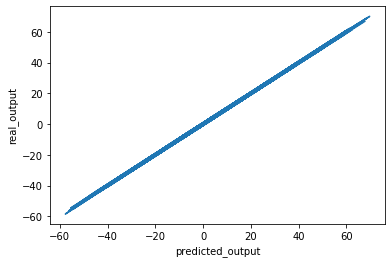

In [21]:
import matplotlib.pyplot as plt

plt.plot(np.squeeze(model.predict_on_batch(input_1)), np.squeeze(z))
plt.xlabel('predicted_output')
plt.ylabel('real_output')
plt.show()

# Explain the parameters and what evaluate function does. What is the significance of batch_size?
##model.evaluate : Returns the loss value & metrics values for the model in test mode. Here we have provided the test_input data and test_target data.
##Batch_size : model.evaluate will run on our test_data same when we were training our model. So updation of weights takes place here also. So batch_size detemines the number of samples which will be updated after gradient update. 


In [22]:
results = model.evaluate(input_1 , z , batch_size = 16)

1000/1000 [==============================] - 0s 66us/sample - loss: 0.3372 - mse: 0.3372


# Which is the loss and which one is error? What do they signify?



##Loss: Value of the objective function we are minimizing. This value could be a positive or negative number, depending on the specific objective function.

##Error: Self defined interpretable metric of our model's performance. Usually means what % of training examples the model got incorrect. This is always a value between 0 and 1.It is basically used to determine the percentage of incorrect values.


In [23]:
print('loss  : {}'.format(results[0]))
print('error : {}'.format(results[1]))
#printing loss and error of dataset.

loss  : 0.3372494370937347
error : 0.33724942803382874


# Plotting Accuracy on each iteration. Explain all the statements below and interpret the chart.
##As the metrics defined was mean_squared_error , graph of accuracy was not printed and as i checked only mse and mase and few others metrics where available for  neural networks regression problem. 'accuracy' metrics is present for classification problem.

## Two different graphs are plotted mse vs epochs and loss vs epochs.
## I have explained the code line by line for intepretation.

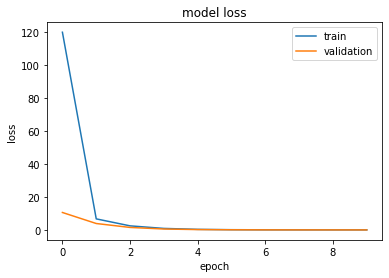

In [24]:
#is this line we are using plt.plot to print the loss function which is stored in hitory.history module.
plt.plot(history.history['loss'])
#is this line we are using plt.plot to print the  validation loss  which is stored in hitory.history module.
plt.plot(history.history['val_loss'])

#using pyplot module of matplotlib library to print the model's title
plt.title('model loss')

#using pyplot module of matplotlib library to print the model's ylabel
plt.ylabel('loss')

#using pyplot module of matplotlib library to print the model's xlabel
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Explain the purpose of following code and interpret the chart.
##Here this code was just used to plot the graph between the mean_squarred error of model and number of epochs over the dataset has been iterated. For every epoch , the mse is calculated and the graph is plotted 

##as I declared above, mse is used to determine the percentage of wrong predcitions or incorrect values.

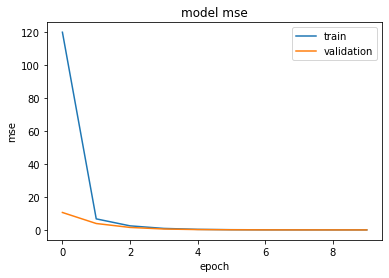

In [25]:
#is this line we are using plt.plot to print the loss function which is stored in hitory.history module.
plt.plot(history.history['mse'])
#is this line we are using plt.plot to print the  validation loss  which is stored in hitory.history module.
plt.plot(history.history['val_mse'])

#using pyplot module of matplotlib library to print the model's title
plt.title('model mse')

#using pyplot module of matplotlib library to print the model's ylabel
plt.ylabel('mse')

#using pyplot module of matplotlib library to print the model's xlabel
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()